<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [6]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Task 1: For the "Median value of owner-occupied homes" provide a boxplot

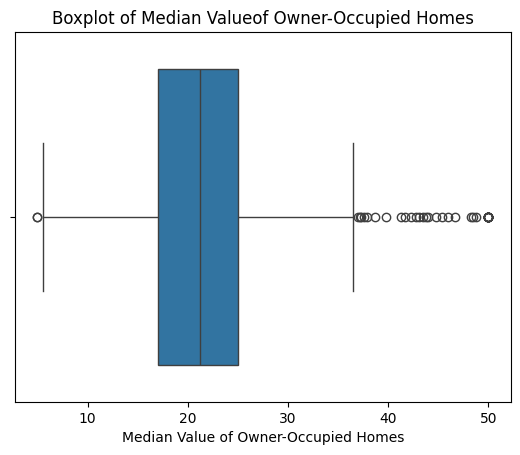

In [22]:
ax = sns.boxplot(x="MEDV", data=boston_df)
plt.title('Boxplot of Median Valueof Owner-Occupied Homes')
plt.xlabel('Median Value of Owner-Occupied Homes')
plt.show()


Average Median value of the Owner Occupied Homes falls between $17000 to $23000 

--------------------------

Task 2: Provide a bar plot for the Charles river variable

C:\Users\lynet\AppData\Local\Temp\ipykernel_17152\717809158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chas_counts.index, y=chas_counts.values, palette="viridis")


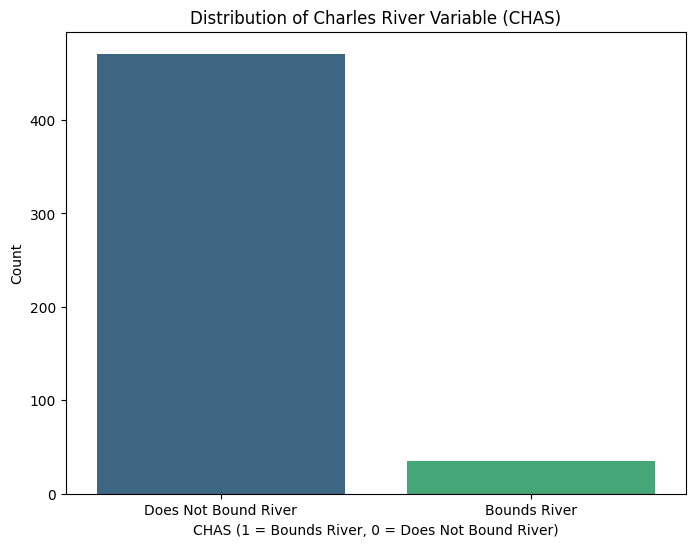

In [23]:
chas_counts = boston_df["CHAS"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=chas_counts.index, y=chas_counts.values, palette="viridis")
plt.title('Distribution of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 = Bounds River, 0 = Does Not Bound River)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Does Not Bound River', 'Bounds River'])
plt.show()

We can see that most of the are does not bound the Charles River

------------------------

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [14]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

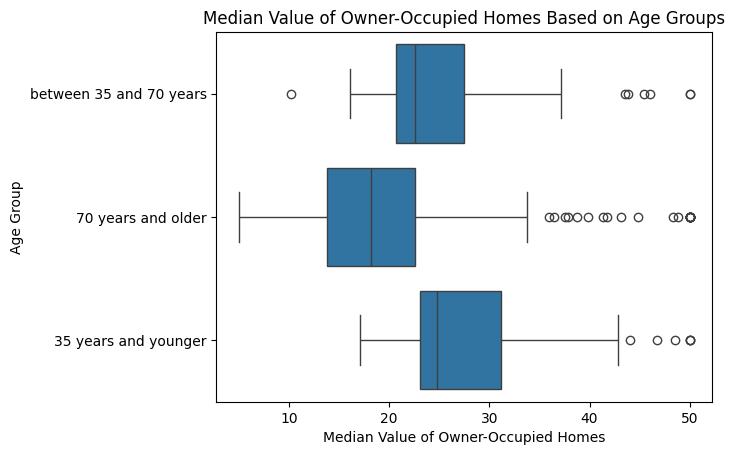

In [24]:
ax = sns.boxplot(x="MEDV", y="age_group", data=boston_df)
plt.title('Median Value of Owner-Occupied Homes Based on Age Groups')
plt.xlabel('Median Value of Owner-Occupied Homes')
plt.ylabel('Age Group')
plt.show()

Value of homes for people between the age of 35 and 70 years of age is around $21000
Value of homes for people above age of 70 is around $18000
Value of homes for people below the age of 35 is around $23000


----------------------

Provide a scatter plot to show the relationship betweem Nitric oxide concentrations and the propotions of non-retail business acres per town. What can you say about the relationships

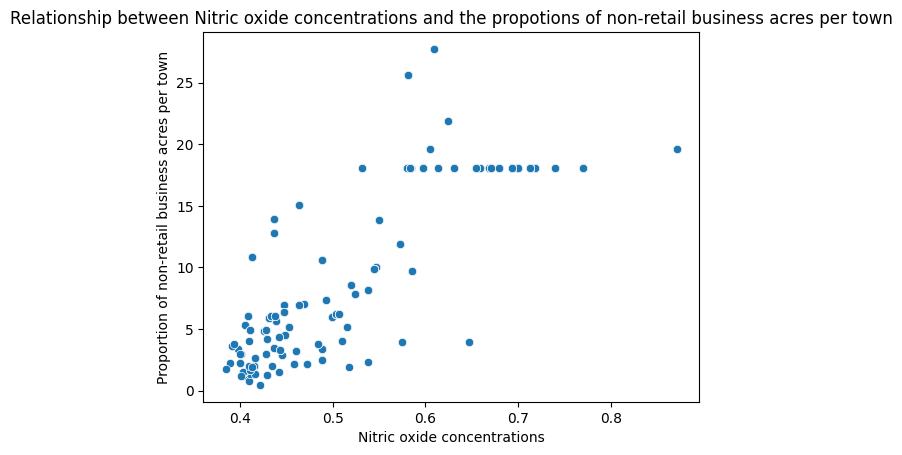

In [25]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship between Nitric oxide concentrations and the propotions of non-retail business acres per town')
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

The relationship between nitric oxide concentrations and non-retail business acres suggests that industrial areas contribute to higher air pollution levels, emphasizing the need for environmental safeguards in urban planning. This highlights the importance of balancing industrial growth with public health considerations.

-------------------

Create a histogram for the pupil to teacher ratio variable

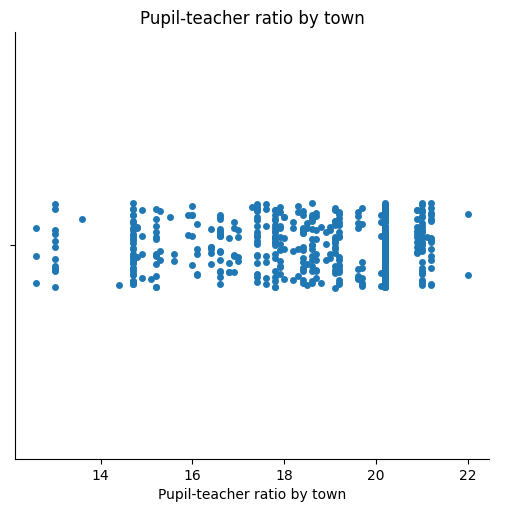

In [26]:
sns.catplot(x='PTRATIO', data=boston_df)
plt.title('Pupil-teacher ratio by town')
plt.xlabel('Pupil-teacher ratio by town')
plt.show()

The variation in pupil-teacher ratios across towns highlights the need for equitable resource distribution to ensure quality education. Lower ratios suggest better individual attention, while higher ratios may indicate areas needing additional support and resources

-------------

Task 3: Use the appropriate tests to answer the questions provided.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


H0: There is a significant difference between Median value of houses bounded by the charles river
Ha: There is no significant difference between Median value of houses bounded by the charles river

In [27]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [31]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since p-valus is less than alpha we reject the null hypothesis (H0)

-----------------------------

Is there a difference in Median values of houses (MEDV) for each propotion of owner occupied units built prior to 1940 (AGE)(ANOVA)

H0: there is difference in Median values of houses (MEDV) for each propotion of owner occupied units built prior to 1940 (AGE)
Ha: there is  no difference in Median values of houses (MEDV) for each propotion of owner occupied units built prior to 1940 (AGE)

In [32]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [35]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
forty_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [36]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, forty_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


 Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that there is difference in Median values of houses (MEDV) for each propotion of owner occupied units built prior to 1940 (AGE)

-----------------

Can we conclude that there is no relationship between Nitic oxide concentrations and proportion of non-retail business acres per town?(Pearson Correlation)

H0: There is no relationship betweem Nitric Oxide and propoation of non- retail business acres per town


Ha: There exists a relationship betweem Nitric Oxide and propoation of non- rtail business acres per town

In [38]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209154, pvalue=7.913361061239591e-98)

As the p-value < alpha we reject null hypo and conculde that there exists a relationship betweem Nitric Oxide and propoation of non- rtail business acres per town

---------------------------

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regressoin analysis)

H0: There is an impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes
Ha: No impact

In [39]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ DIS', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq         F        PR(>F)
DIS         1.0   2668.246572  2668.246572  33.57957  1.206612e-08
Residual  504.0  40048.048843    79.460414       NaN           NaN


Since P-value is less than alpha we reject null hypothesis